# Sparse Hebbian Learning: basics

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.

Here, we will show the basic operations that are implemented in this package. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 1, 0
DEBUG_DOWNSCALE, verbose = 10, 10
DEBUG_DOWNSCALE, verbose = 1, 10
#matname = 'HAP_quantization'
homeo_method = 'HEH'
matname = 'quantization_' + homeo_method
homeo_params = dict(eta_homeo=0.05, alpha_homeo=0.02, C=5., nb_quant=128, P_cum=None)
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, homeo_method=homeo_method, homeo_params=homeo_params, verbose=verbose)

In [4]:
from shl_scripts.shl_experiments import SHL
shl = SHL(**opts)
data = shl.get_data(matname='quantization')

Extracting data..No cache found /tmp/data_cache/quantization_data: Extracting data... Extracting data..16.0
bird08.png, 16.0
yellowleaves39.png, 16.0
rocky10.png, 16.0
bittern62.png, 16.0
flowerhill29.png, 16.0
clouds43.png, 16.0
goldwater67.png, 16.0
calcoast09.png, 16.0
yose05.png, 16.0
woods54.png, 16.0
koala52.png, 16.0
bora04.png, 16.0
flowers37.png, 16.0
yose07.png, 16.0
cattails70.png, 16.0
hibiscus30.png, 16.0
cucorn50.png, 16.0
geyser27.png, 16.0
reflection63.png, 16.0
craterlake12.png, Data is of shape : (81920, 256) - done in 9.90s.
Data is of shape : (81920, 256) - done in 10.59s.


In [5]:
!ls -l {shl.data_cache}/{matname}*

-rw-r--r--  1 lolo  wheel  1260770 Feb  7 11:51 /tmp/data_cache/quantization_HEH_dico.pkl


In [6]:
!ls -l {shl.data_cache}/{matname}*

-rw-r--r--  1 lolo  wheel  1260770 Feb  7 11:51 /tmp/data_cache/quantization_HEH_dico.pkl


In [7]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (81920, 256)
average of patches =  -0.00020747789700517423  +/-  0.04324992231480433
average energy of data =  0.5939509574518304 +/- 0.5661269699098173


In [8]:
shl.do_precision

False

## learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

loading the dico called : /tmp/data_cache/quantization_HEH_dico.pkl


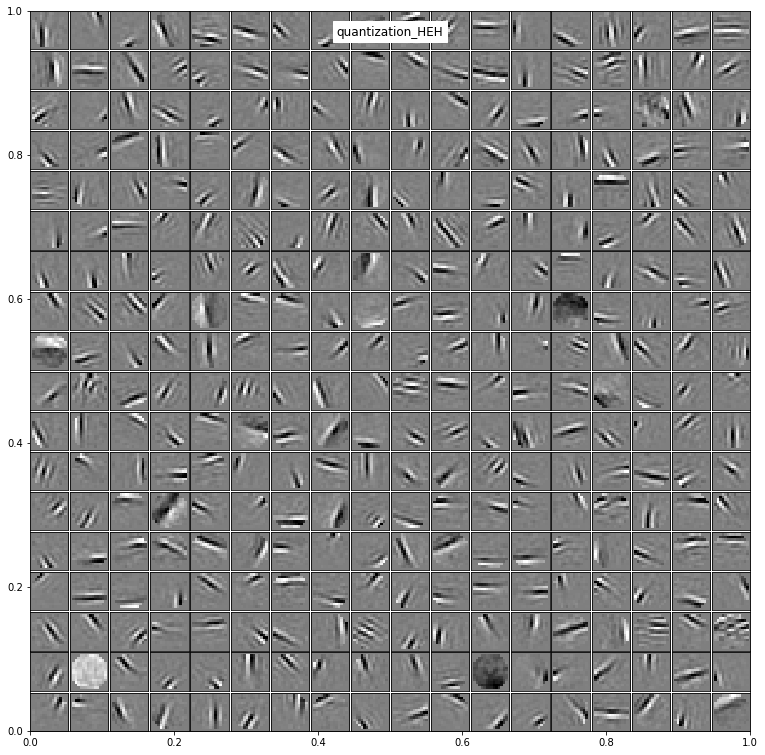

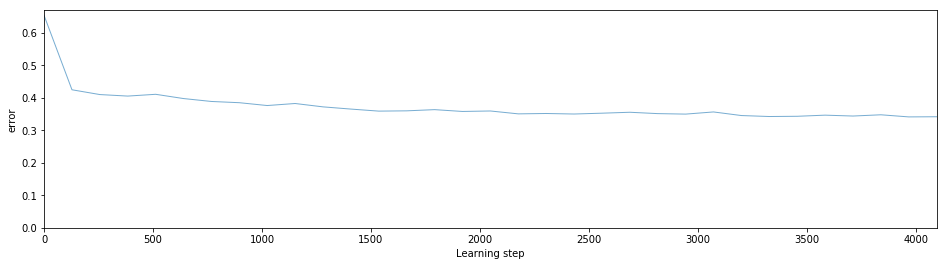

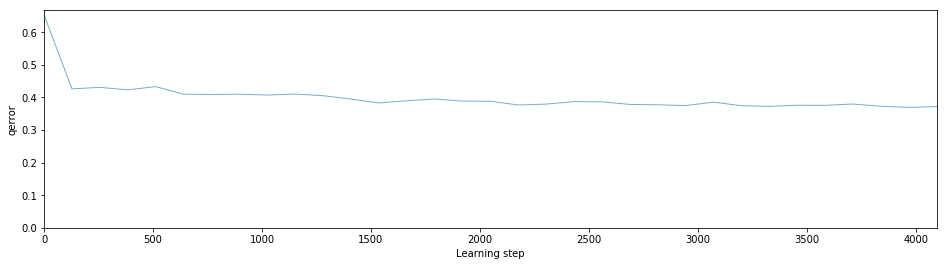

In [9]:
list_figures = ['show_dico', 'time_plot_error', 'time_plot_qerror']#, 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']

dico = shl.learn_dico(data=data, list_figures=list_figures, matname=matname)

In [10]:
print('size of dictionary = (number of filters, size of imagelets) = ', dico.dictionary.shape)
print('average of filters = ',  dico.dictionary.mean(axis=1).mean(), 
      '+/-',  dico.dictionary.mean(axis=1).std())
SE = np.sqrt(np.sum(dico.dictionary**2, axis=1))
print('average energy of filters = ', SE.mean(), '+/-', SE.std())

size of dictionary = (number of filters, size of imagelets) =  (324, 256)
average of filters =  3.834536964154693e-05 +/- 0.005092280020385613
average energy of filters =  1.0 +/- 9.127666885870573e-17


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

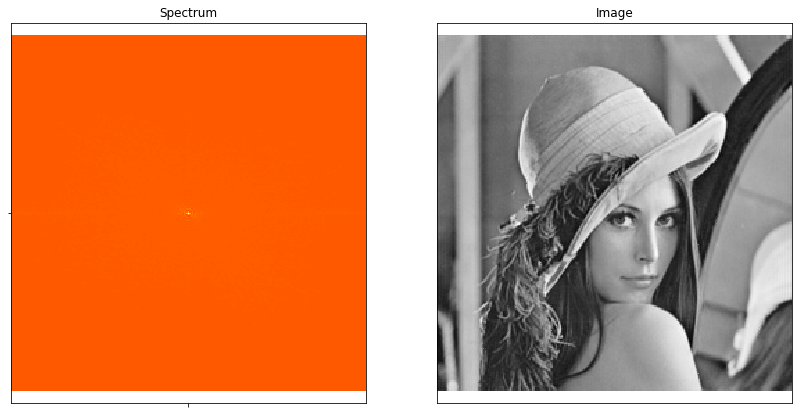

In [11]:
from SLIP import Image
im = Image('https://raw.githubusercontent.com/bicv/SLIP/master/default_param.py')
image= im.imread('https://raw.githubusercontent.com/bicv/SLIP/master/database/lena256.png')
im.set_size(image)
_  = im.show_spectrum(image)


In [12]:
np.tanh(4*(np.linspace(0, .5, 20)-.25))

array([-0.7616, -0.7137, -0.6581, -0.5942, -0.5219, -0.4412, -0.3526,
       -0.2572, -0.1566, -0.0526,  0.0526,  0.1566,  0.2572,  0.3526,
        0.4412,  0.5219,  0.5942,  0.6581,  0.7137,  0.7616])

-0.0 0.9999078516389708


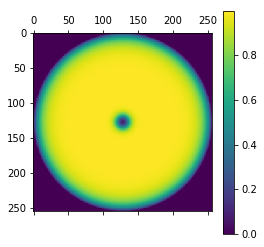

In [13]:
#im.f_mask = np.ones_like(im.retina())
# removing high frequencies in the corners
df=.07
im.f_mask = (1-np.exp((im.f-.5)/(.5*df)))*(im.f<.5)
# removing low frequencies
im.f_mask *= .5*(np.tanh( 40.*(im.f-.5/16))+1)
print(im.f_mask.min(), im.f_mask.max())
#_  = im.show_FT(im.f_mask)
plt.matshow(im.f_mask)
plt.colorbar()

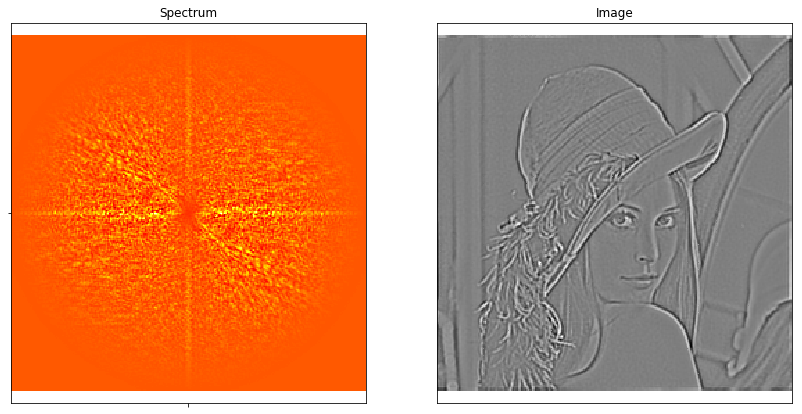

In [14]:
white = im.whitening(image)
white_pre = im.preprocess(white)
_  = im.show_spectrum(white_pre)

🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (256, 324)
average of codewords =  0.20941562575304684
l0-sparseness of codewords =  0.3237726658950617  ~= l0/M = 0.09259259259259259
average energy of codewords =  0.7057710459069515
std of the average of individual patches =  0.05473521627844832
number of codes, size of reconstructed images =  (256, 256)


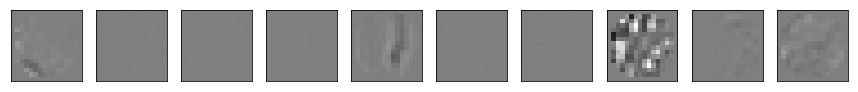

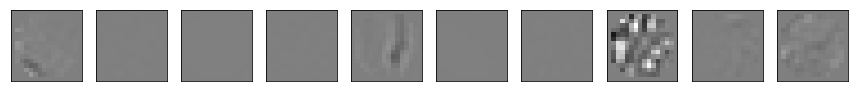

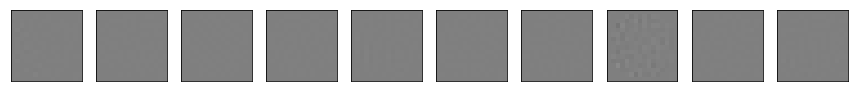

average of data patches =  -0.00020747789700517423 +/- 0.04324992231480433
average of residual patches =  -6.302150547271795e-05 +/- 0.0025499703599852048
median energy of data =  0.49641992691046577
average energy of data =  0.6063788658481831 +/- 0.5791159010412764
average error =  -6.302150547271795e-05 +/- 0.13347968491053366
average energy of residual =  0.10058338259671035 +/- 0.08774858062059628
median energy of residual =  0.08561007713165347
average gain of coding =  6.1154447341535185 +/- 2.09889036646456
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (256, 324)
average of codewords =  0.20941562575304684
l0-sparseness of codewords =  0.3237726658950617  ~= l0/M = 0.09259259259259259
average energy of codewords =  0.7057710459069516
std of the average of individual patches =  0.05473521627844832
number of codes, size of reconstructed images =  (256, 256)


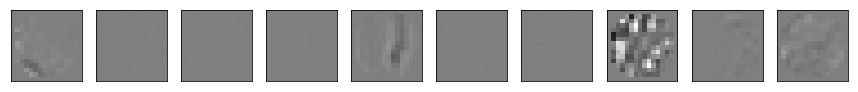

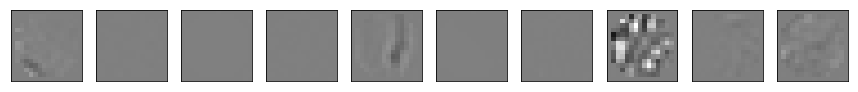

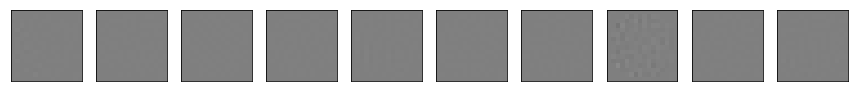

average of data patches =  -0.00020747789700517423 +/- 0.04324992231480433
average of residual patches =  -6.302150547271945e-05 +/- 0.002549970359985207
median energy of data =  0.49641992691046577
average energy of data =  0.6063788658481831 +/- 0.5791159010412764
average error =  -6.302150547271945e-05 +/- 0.13347968491053366
average energy of residual =  0.10058338259671036 +/- 0.08774858062059629
median energy of residual =  0.08561007713165347
average gain of coding =  6.1154447341535185 +/- 2.09889036646456
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (256, 324)
average of codewords =  0.20963463656329934
l0-sparseness of codewords =  0.32491801697530864  ~= l0/M = 0.09259259259259259
average energy of codewords =  0.7056993737307908
std of the average of individual patches =  0.05567083828208419
number of codes, size of reconstructed images =  (256, 256)


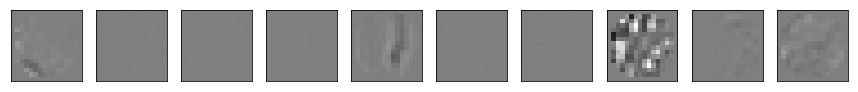

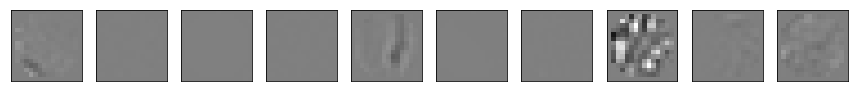

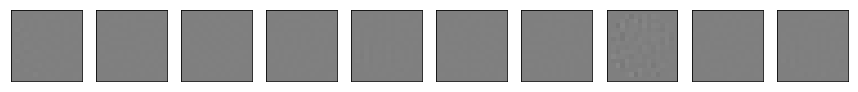

average of data patches =  -0.00020747789700517423 +/- 0.04324992231480433
average of residual patches =  -0.0025892488007083583 +/- 0.006168297898592268
median energy of data =  0.49641992691046577
average energy of data =  0.6063788658481831 +/- 0.5791159010412764
average error =  -0.0025892488007083583 +/- 0.1351260058867277
average energy of residual =  0.10206148741636714 +/- 0.08859567970624002
median energy of residual =  0.08988854775452468
average gain of coding =  6.026041274002866 +/- 2.057133719286851


In [35]:
from shl_scripts.shl_encode import mp
nb_quant = 128
record_num_batches = 256
np.random.seed(1973)
indx = np.random.permutation(data.shape[0])[:record_num_batches]
#sparse_code = shl.code(data, dico, matname=matname)
P_cum_zeroeffect = np.linspace(0, 1, nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))
#P_cum = dico.P_cum
#P_cum = None
l0_sparseness = shl.l0_sparseness
l0_sparseness = 150

for P_cum, gain in zip([None, P_cum_zeroeffect, dico.P_cum], [np.ones(shl.n_dictionary), None, None]):
    print(50*'🐒')
    sparse_code = mp(data[indx, :], dico.dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum, gain=gain)

    print('number of codes, size of codewords = ', sparse_code.shape)
    print('average of codewords = ', sparse_code.mean())
    print('l0-sparseness of codewords = ', (sparse_code>0).mean(), ' ~= l0/M =', shl.l0_sparseness/shl.n_dictionary)
    print('average energy of codewords = ', sparse_code.std(axis=0).mean())
    print('std of the average of individual patches = ', sparse_code.mean(axis=0).std())

    patches = sparse_code @ dico.dictionary
    print('number of codes, size of reconstructed images = ', patches.shape)

    from shl_scripts.shl_tools import show_data
    max_patches = 10
    fig, axs = show_data(data[indx, :][:max_patches, :])
    plt.show()
    fig, axs = show_data(patches[:max_patches, :])
    plt.show()
    error = (data[indx, :] - patches)
    fig, axs = show_data(error[:max_patches, :], cmax=np.max(np.abs(data[:max_patches, :])))
    plt.show()
    print('average of data patches = ', data.mean(), '+/-', data.mean(axis=1).std())
    print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
    SD = np.sqrt(np.mean(data[indx, :]**2, axis=1))
    #SD = np.linalg.norm(data[indx, :])/record_num_batches

    print('median energy of data = ', np.median(SD))
    print('average energy of data = ', SD.mean(), '+/-', SD.std())
    #print('total energy of data = ', np.sqrt(np.sum(data**2)))
    #print('total deviation of data = ', np.sum(np.abs(data)))
    print('average error = ', error.mean(), '+/-', error.std())
    SE = np.sqrt(np.mean(error**2, axis=1))
    #SE = np.linalg.norm(error)/record_num_batches

    print('average energy of residual = ', SE.mean(), '+/-', SE.std())
    print('median energy of residual = ', np.median(SE))
    #print('total energy of residual = ', np.sqrt(np.sum(error**2)))
    #print('total deviation of residual = ', np.sum(np.abs(error)))
    print('average gain of coding = ', (SD/SE).mean(), '+/-', (SD/SE).std())

## Quantization of the coefficients

In [16]:
from shl_scripts.shl_learn import get_P_cum
C = 5.
P_cum = get_P_cum(sparse_code, C=C, nb_quant=nb_quant)
P_cum.shape

(324, 128)

In [17]:
P_cum = dico.P_cum
P_cum.shape

(324, 128)

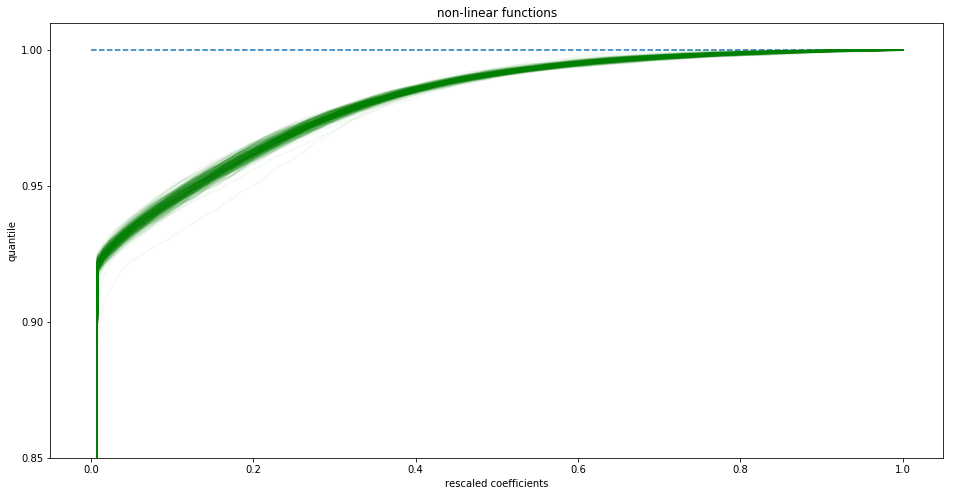

In [18]:
from shl_scripts.shl_tools import plot_P_cum
fig, ax = plot_P_cum(P_cum, verbose=False);
ax.set_ylim(0.85, 1.01);

In [19]:
P_cum.shape

(324, 128)

In [20]:
from shl_scripts.shl_encode import quantile, rescaling
#sparse_code = mp(data, dico.dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum)
stick = np.arange(shl.n_dictionary)*nb_quant
q = quantile(P_cum, rescaling(sparse_code, C=C), stick, do_fast=True)

In [21]:
from shl_scripts.shl_encode import inv_quantile, inv_rescaling
q_sparse_code = inv_rescaling(inv_quantile(P_cum, q), C=C)
print('total deviation of coefficients = ', np.mean(np.abs(q_sparse_code-sparse_code)))

total deviation of coefficients =  0.0018642586496274399


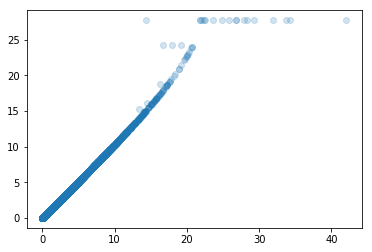

In [22]:
plt.scatter(sparse_code.ravel(), q_sparse_code.ravel(), alpha=.2);

In [23]:
P_cum.mean(axis=0).shape

(128,)

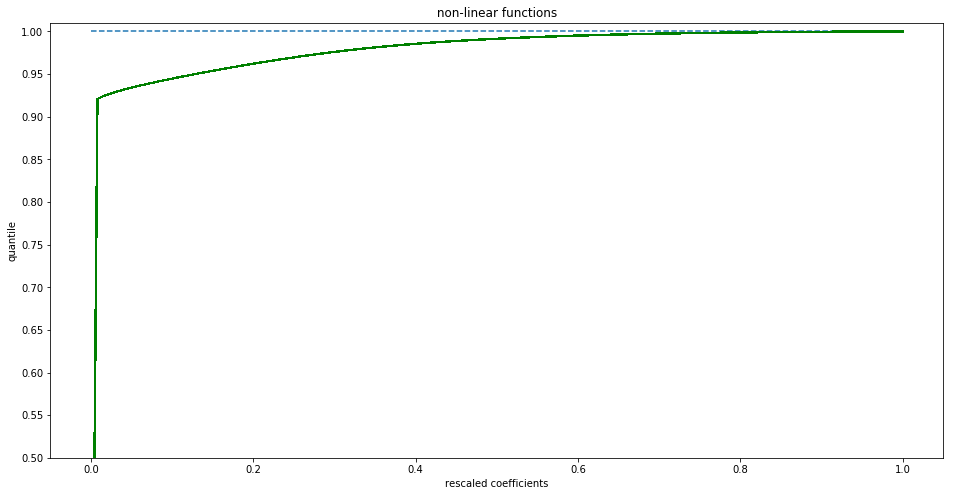

In [24]:
P_cum_mean = P_cum.mean(axis=0)[np.newaxis, :] * np.ones((shl.n_dictionary, nb_quant))
fig, ax = plot_P_cum(P_cum_mean, verbose=False);
ax.set_ylim(0.5, 1.01);

In [25]:
#q_sparse_code = inv_rescaling(inv_quantile(P_cum_mean, q), C=C)
q_sparse_code = inv_rescaling(inv_quantile(P_cum_mean, q), C=C)
print('total deviation of coefficients = ', np.mean(np.abs(sparse_code)))
print('total deviation of coefficients = ', np.mean(np.abs(q_sparse_code-sparse_code)))

total deviation of coefficients =  0.12819321874550854
total deviation of coefficients =  0.007371863675284602


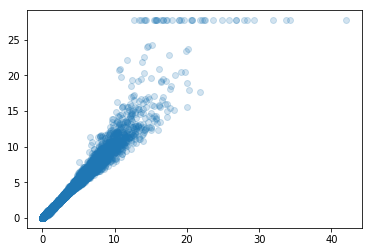

In [26]:
plt.scatter(sparse_code.ravel(), q_sparse_code.ravel(), alpha=.2);

average of data patches =  -0.00020747789700517423 +/- 0.04324992231480433
average of residual patches =  -0.002344521501887534 +/- 0.023439513477783974
median energy of data =  0.293492164677963
average energy of data =  0.293492164677963 +/- 0.0
average energy of residual =  0.10674467495801537 +/- 0.0
median energy of residual =  0.10674467495801537
average gain of coding =  2.7494782741471537 +/- 0.0


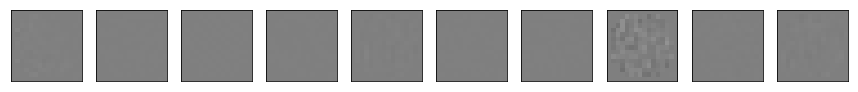

In [27]:
patches = q_sparse_code @ dico.dictionary
error = data[indx, :] - patches
fig, axs = show_data(error[:max_patches, :], cmax=np.max(np.abs(data[:max_patches, :])))
print('average of data patches = ', data.mean(), '+/-', data.mean(axis=1).std())
print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
#SD = np.sqrt(np.mean(data[indx, :]**2, axis=1))
SD = np.linalg.norm(data[indx, :])/record_num_batches
print('median energy of data = ', np.median(SD))
print('average energy of data = ', SD.mean(), '+/-', SD.std())
#print('total energy of data = ', np.sqrt(np.sum(data**2)))
#print('total deviation of data = ', np.sum(np.abs(data)))
#SE = np.sqrt(np.mean(error**2, axis=1))
SE = np.linalg.norm(error)/record_num_batches

print('average energy of residual = ', SE.mean(), '+/-', SE.std())
print('median energy of residual = ', np.median(SE))
#print('total energy of residual = ', np.sqrt(np.sum(error**2)))
#print('total deviation of residual = ', np.sum(np.abs(error)))
print('average gain of coding = ', (SD/SE).mean(), '+/-', (SD/SE).std())

In [28]:
P_cum[0, -2]

0.9999070999397321

## Version used

In [29]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.4 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
IPython 6.2.1
OS Darwin 17.4.0 x86_64 i386 64bit
numpy 1.14.0
shl_scripts 20171221
Wed Feb 07 14:50:09 2018 CET